* [Multilevel Models using lmer](https://cran.r-project.org/web/packages/multilevelTools/vignettes/lmer-vignette.html)
* [Linear mixed-effects models for within-participant psychology experiments](https://www.frontiersin.org/articles/10.3389/fpsyg.2015.00002/full)
* [Power Analysis and Effect Size in Mixed Effects Models: A Tutorial](https://www.journalofcognition.org/articles/10.5334/joc.10/)
* [A practical guide to calculating Cohen’s f2, a measure of local effect size, from PROC MIXED](https://www.frontiersin.org/articles/10.3389/fpsyg.2012.00111/full)

# Data import

In [1]:
library(tidyverse)
library(broom)
library(lme4)
library(Hmisc)
library(lattice)
library(ggpubr)
library(effectsize)

options(repr.plot.width=7, repr.plot.height=5)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘broom’ was built under R version 3.6.3”Warning message:
“package ‘lme4’ was built under R version 3.6.3”Loading required package: Matrix

Attaching package:

In [2]:
AVRECPeakAM <- read_csv(file = "../Data/AVRECPeakAMST.csv")
AVRECPeakAM_AVG <- read_csv(file = "../Data/AVRECPeakAM.csv")

Parsed with column specification:
cols(
  Group = col_character(),
  Animal = col_character(),
  Layer = col_character(),
  Measurement = col_character(),
  ClickFreq = col_double(),
  OrderofClick = col_double(),
  TrialNumber = col_double(),
  PeakAmp = col_double(),
  PeakLat = col_double(),
  RMS = col_double()
)
Parsed with column specification:
cols(
  Group = col_character(),
  Animal = col_character(),
  Layer = col_character(),
  Measurement = col_character(),
  ClickFreq = col_double(),
  OrderofClick = col_double(),
  PeakAmp = col_double(),
  PeakLat = col_double(),
  RMS = col_double()
)


In [10]:
# AVRECPeakAM  %>% 
#     group_by(Group, Animal, Layer, Measurement, ClickFreq, OrderofClick) %>% 
#     summarise(
#         PeakAmp = mean(PeakAmp, na.rm=TRUE),
#         PeakLat = mean(PeakLat, na.rm=TRUE), 
#         RMS = mean(RMS, na.rm=TRUE)) %>% 
#     ungroup()

In [3]:
head(AVRECPeakAM)

Group,Animal,Layer,Measurement,ClickFreq,OrderofClick,TrialNumber,PeakAmp,PeakLat,RMS
KIC,KIC02,All,preAM_1,2,1,1,NaN,NaN,0.0010574404
KIC,KIC02,All,preAM_1,2,2,1,NaN,NaN,0.0021708039
KIC,KIC02,All,preAM_1,2,1,2,0.0006369614,28,0.0004592697
KIC,KIC02,All,preAM_1,2,2,2,NaN,NaN,0.0003424592
KIC,KIC02,All,preAM_1,2,1,3,0.0067266487,18,0.0027112759
KIC,KIC02,All,preAM_1,2,2,3,0.0018615812,47,0.0015803064


In [4]:
summary(AVRECPeakAM)

    Group              Animal             Layer           Measurement       
 Length:2291050     Length:2291050     Length:2291050     Length:2291050    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   ClickFreq      OrderofClick    TrialNumber       PeakAmp      
 Min.   : 2.00   Min.   : 1.00   Min.   : 1.00   Min.   :0       
 1st Qu.:20.00   1st Qu.: 5.00   1st Qu.:12.00   1st Qu.:0       
 Median :40.00   Median :11.00   Median :23.00   Median :0       
 Mean   :27.63   Mean   :14.31   Mean   :23.62   Mean   :0       
 3rd Qu.:40.00   3rd Qu.:21.00   3rd Qu.:35.00   3rd Q

In [6]:
# describe(AVRECPeakAM)

# Modeling

Notes:

* `RMS` variable was log-transformed since the distribution was right-skewed (resulting in a fan shape residuals plots).
* Values in `coef()` function is the actual intercept for an animal. `ranef()` shows the difference from a "main" intercept.

## Two-way ANOVA vs LM

(not really relevant)

In [29]:
model0 <- lm(formula = "RMS*1e3 ~ Group * Layer", data = AVRECPeakAM_AVG)
summary(model0)


Call:
lm(formula = "RMS*1e3 ~ Group * Layer", data = AVRECPeakAM_AVG)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5772 -0.1169 -0.0548  0.0439  6.1330 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         0.842571   0.004151  202.981  < 2e-16 ***
GroupKIT           -0.092457   0.005870  -15.750  < 2e-16 ***
GroupKIV            0.037192   0.006378    5.831 5.55e-09 ***
LayerI_II          -0.651912   0.006122 -106.489  < 2e-16 ***
LayerIV            -0.591169   0.005950  -99.352  < 2e-16 ***
LayerV             -0.704405   0.006012 -117.173  < 2e-16 ***
LayerVI            -0.738770   0.005917 -124.852  < 2e-16 ***
GroupKIT:LayerI_II  0.046637   0.008698    5.362 8.27e-08 ***
GroupKIV:LayerI_II  0.009882   0.009289    1.064  0.28739    
GroupKIT:LayerIV    0.058044   0.008461    6.860 6.95e-12 ***
GroupKIV:LayerIV   -0.053359   0.009111   -5.856 4.76e-09 ***
GroupKIT:LayerV     0.089260   0.008502   10.498  < 2e-16 ***
GroupKIV:Layer

In [24]:
model_anova <- aov(formula = RMS * 1e3 ~ Group * Layer, data = AVRECPeakAM_AVG)
summary(model_anova)

               Df Sum Sq Mean Sq F value Pr(>F)    
Group           2     20     9.9   152.5 <2e-16 ***
Layer           4   3520   880.0 13536.8 <2e-16 ***
Group:Layer     8     23     2.9    44.3 <2e-16 ***
Residuals   48402   3147     0.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3173 observations deleted due to missingness

In [27]:
(20+ 3520+23) / (2+4+8) / (3147 / 48402)

[1] 3914.302

## logRMS ~ Measurement + (...|Animal)

* Random effect: Animal
* Fixed effect: Measurement

### (1|Animal); random intercept, fixed slope

$$logRMS = (b_0 + b^{A}_0) + b_1 \cdot Measurement$$

In [40]:
temp_df <- AVRECPeakAM %>% 
    filter(
        ClickFreq == 2,
        OrderofClick == 2,
        Layer == "I_II",
        Measurement %in% c("preAM_1", "AM_1")) %>% 
    mutate(logRMS = log(RMS)) %>% 
    ungroup()

temp_df$Measurement <- factor(
    x = temp_df$Measurement, 
    levels = c("preAM_1", "AM_1"))

Warning message:
“Removed 134 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 134 rows containing missing values (geom_point).”

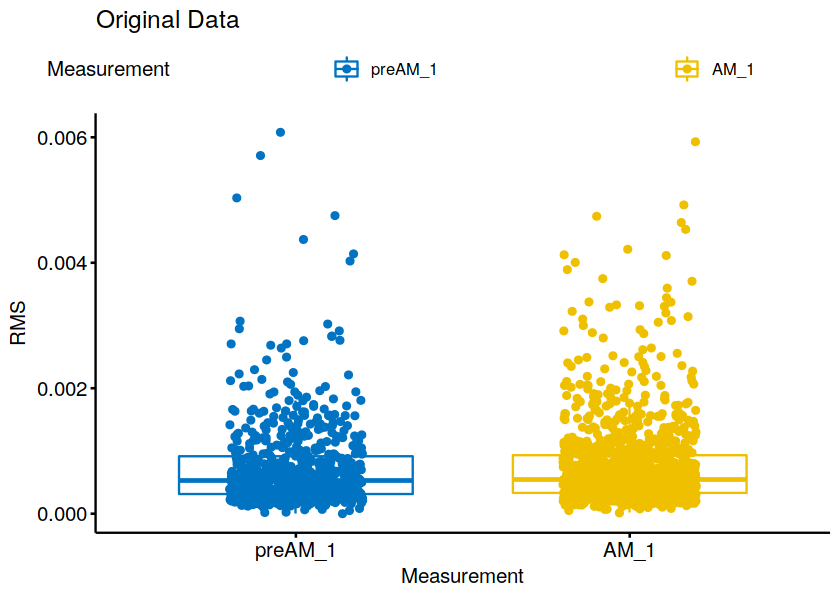

In [7]:
ggboxplot(
    temp_df, x = "Measurement", y = "RMS", color = "Measurement", 
    palette = "jco", add = "jitter", title = "Original Data"
)

Warning message:
“Removed 134 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 134 rows containing missing values (geom_point).”

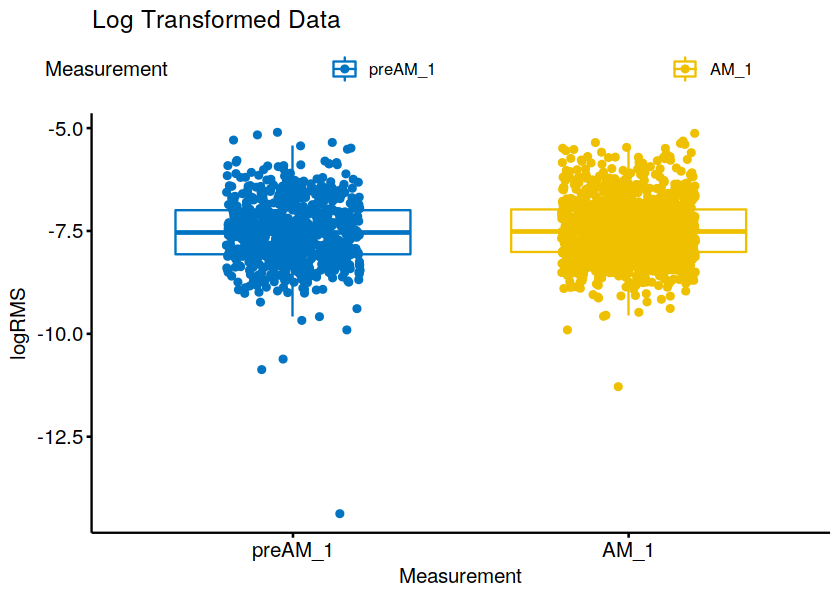

In [8]:
ggboxplot(
    temp_df, x = "Measurement", y = "logRMS", color = "Measurement", 
    palette = "jco", add = "jitter", title = "Log Transformed Data"
)

In [53]:
simple_model <- lmer(formula = logRMS ~ Measurement + (1|Animal), data = temp_df)
summary(simple_model)

Linear mixed model fit by REML ['lmerMod']
Formula: logRMS ~ Measurement + (1 | Animal)
   Data: temp_df

REML criterion at convergence: 3990.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.0526  -0.6046  -0.0335   0.6460   3.0526 

Random effects:
 Groups   Name        Variance Std.Dev.
 Animal   (Intercept) 0.1635   0.4044  
 Residual             0.4498   0.6707  
Number of obs: 1912, groups:  Animal, 26

Fixed effects:
                Estimate Std. Error t value
(Intercept)     -7.53568    0.08317 -90.608
MeasurementAM_1  0.08215    0.03191   2.574

Correlation of Fixed Effects:
            (Intr)
MesrmntAM_1 -0.236

* on average logRMS increases by 0.08215 with the AM_1;
* slope (same for every animal) = 0.08215;
* average intercept = -7.53568;
* variability from the intercept among animals = 0.1635;
* variability from the prediction line = 0.4498;

In [29]:
# ggplot() +
#     geom_histogram(
#         aes(x = coef(simple_model)$Animal[, "(Intercept)"]),
#         bins = 25,
#         fill = "lightblue") +
#     labs(
#         x = "Actual intercept value",
#         title = "Histogram of Intercepts for Animals")

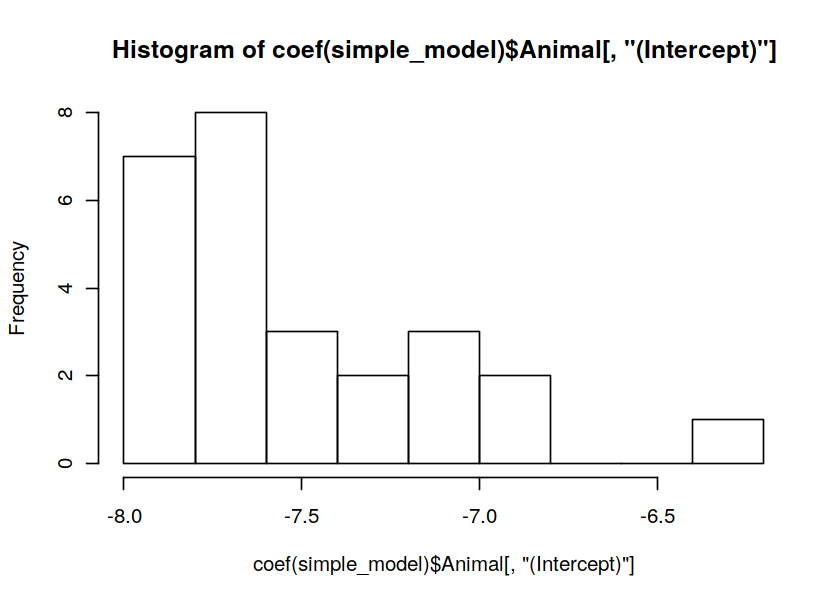

In [10]:
hist(coef(simple_model)$Animal[, "(Intercept)"])

$Animal


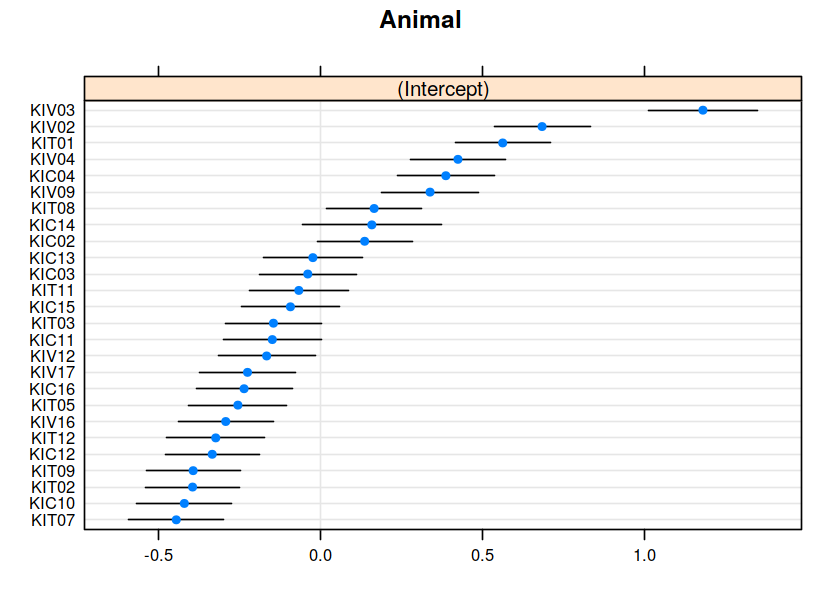

In [11]:
# how different are animals from the grand intercept mean
dotplot(ranef(simple_model, condVar = TRUE))

Residuals check:

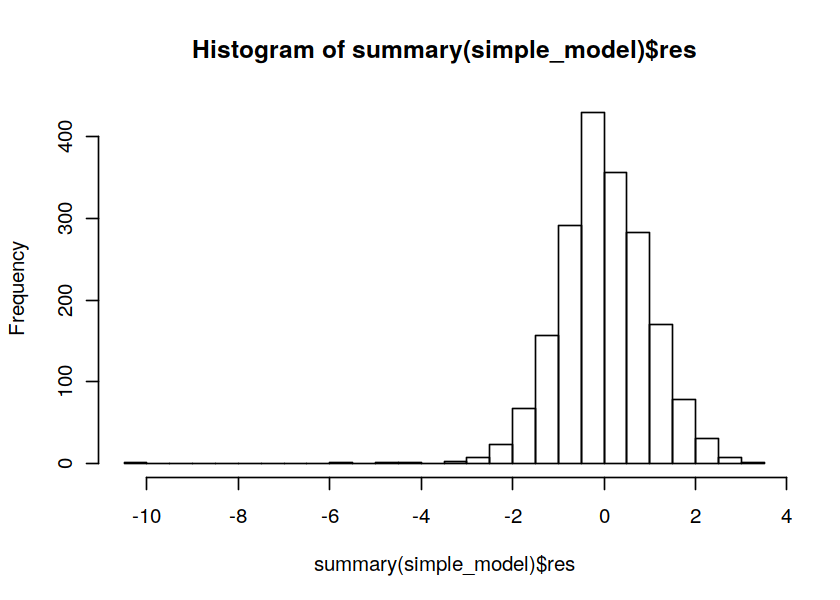

In [12]:
hist(summary(simple_model)$res, breaks = 25)

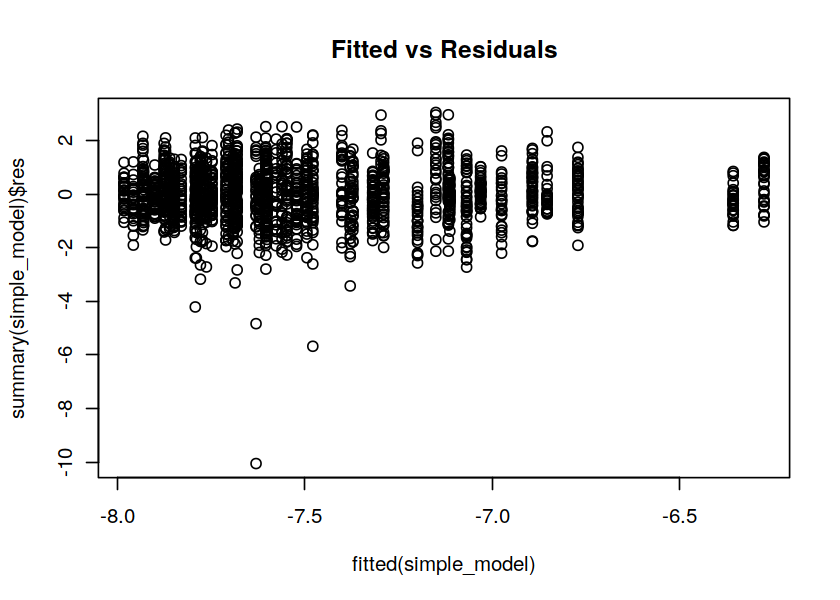

In [14]:
plot(
    fitted(simple_model), summary(simple_model)$res, 
    main = "Fitted vs Residuals")

### (Measurement|Animal); random intercept & slope (by Measurement)

$$logRMS = (b_0 + b^{A}_0) + (b_1 + b^{A}_1)  \cdot Measurement$$

In [60]:
simple_model <- lmer(formula = logRMS ~ Measurement + (Measurement|Animal), data = temp_df)
summary(simple_model)

Linear mixed model fit by REML ['lmerMod']
Formula: logRMS ~ Measurement + (Measurement | Animal)
   Data: temp_df

REML criterion at convergence: 3904.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.1649  -0.5915   0.0289   0.6593   2.7929 

Random effects:
 Groups   Name            Variance Std.Dev. Corr 
 Animal   (Intercept)     0.1623   0.4028        
          MeasurementAM_1 0.1563   0.3954   -0.22
 Residual                 0.4187   0.6470        
Number of obs: 1912, groups:  Animal, 26

Fixed effects:
                Estimate Std. Error t value
(Intercept)     -7.52979    0.08263 -91.129
MeasurementAM_1  0.10320    0.08362   1.234

Correlation of Fixed Effects:
            (Intr)
MesrmntAM_1 -0.284

* variation from the average slope = 0.1563;
* correlation between the slope and intercept = -0.284 (the lower the initial logRMS value, the more it increases with the post measurement) 

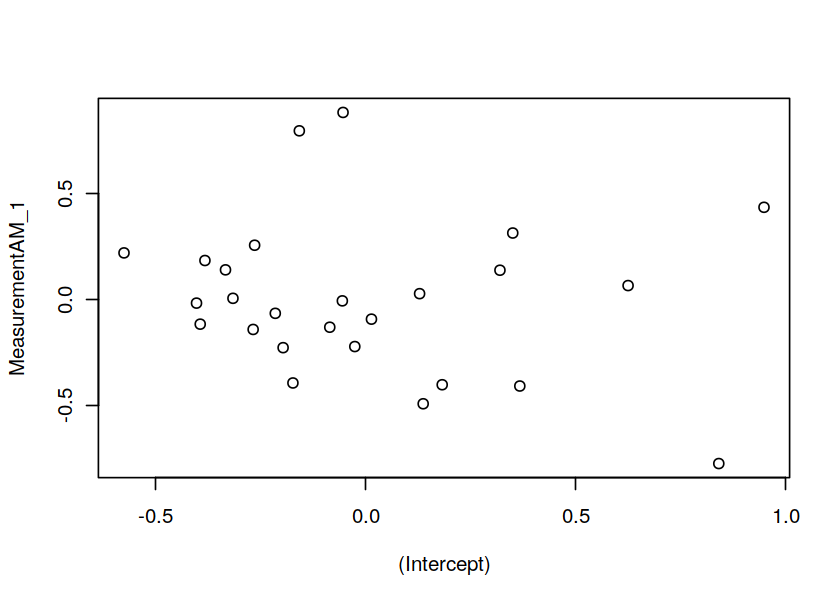

In [63]:
# correlation between the intercept and slope
plot(ranef(simple_model, condVar = TRUE)$Animal)

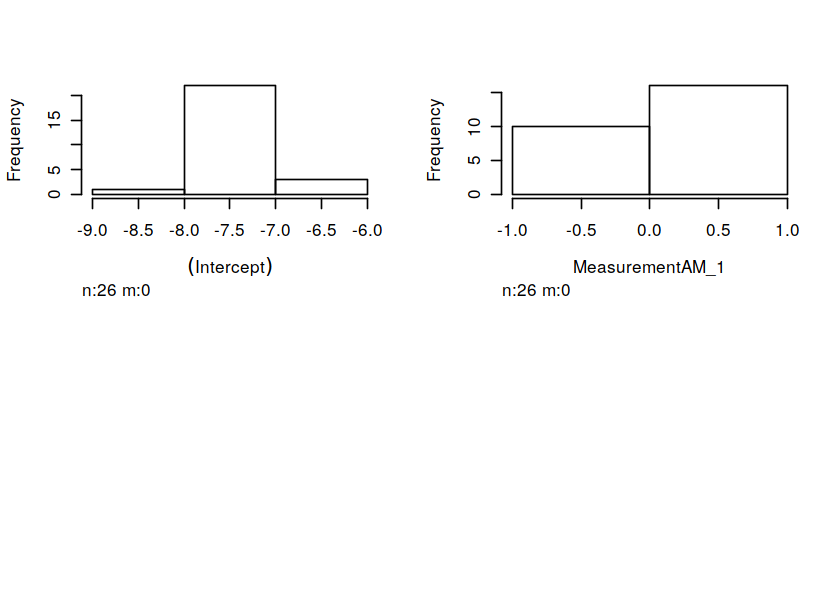

In [65]:
hist(coef(simple_model)$Animal)

$Animal


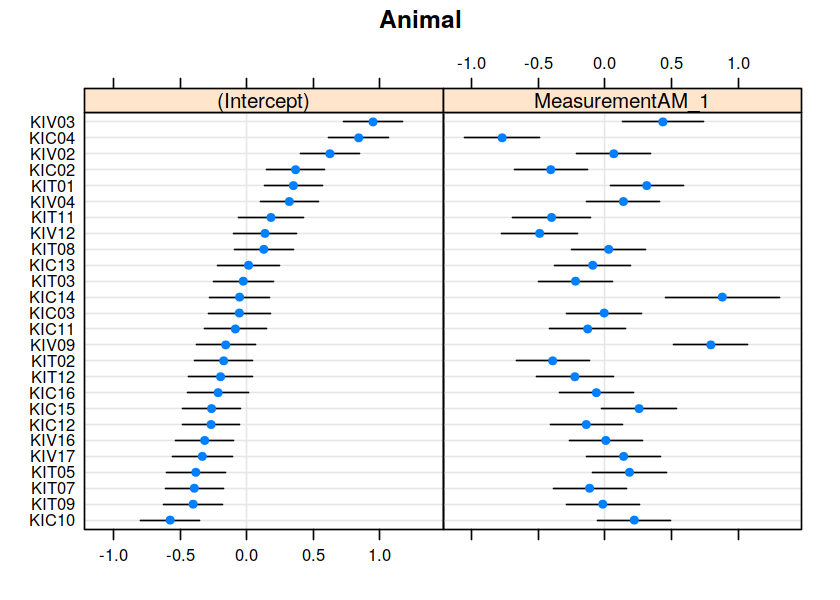

In [64]:
dotplot(ranef(simple_model, condVar = TRUE))

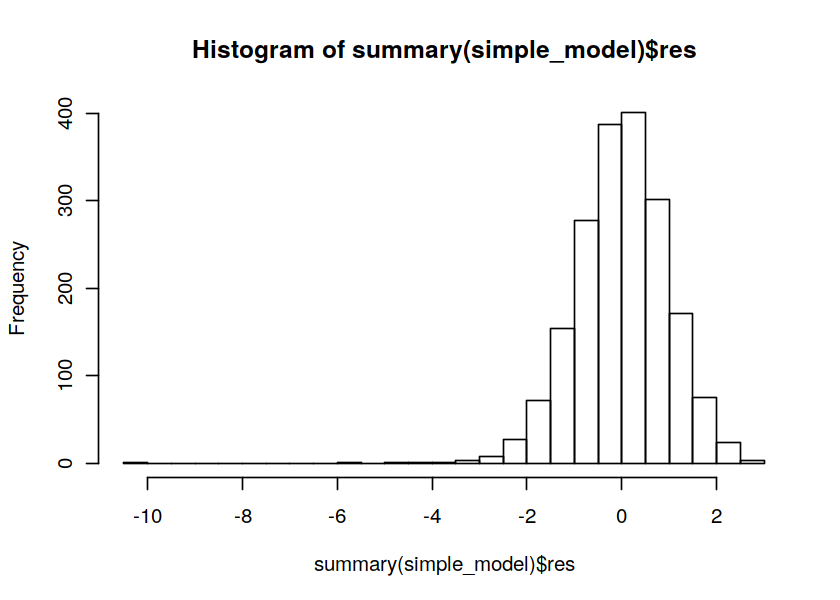

In [38]:
hist(summary(simple_model)$res, breaks = 25)

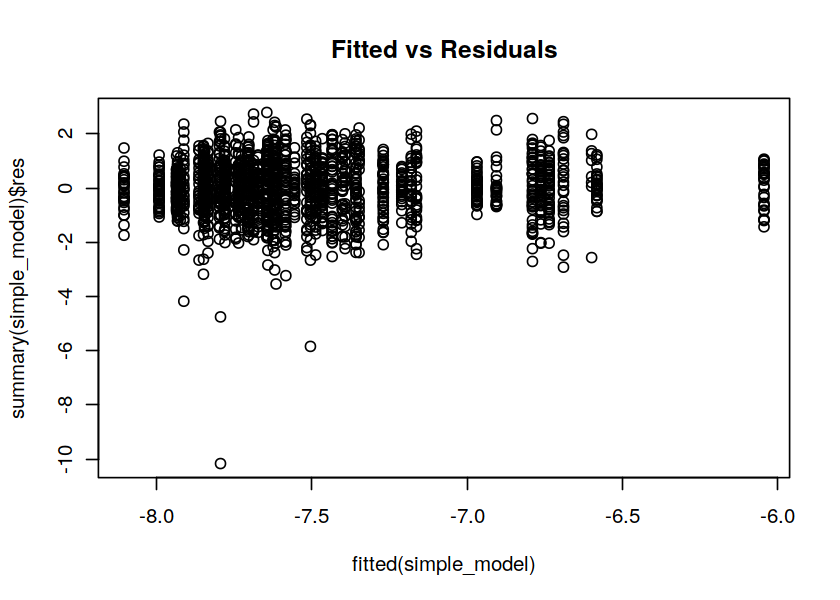

In [39]:
plot(
    fitted(simple_model), summary(simple_model)$res, 
    main = "Fitted vs Residuals")

## log(RMS) ~ Group*Measurement + (...|Animal)

* Random effect: Animal
* Fixed effect: Measurement * Group

### (1|Animal); random intercept, fixed slope


In [75]:
temp_df <- AVRECPeakAM %>% 
    filter(
        ClickFreq == 2,
        OrderofClick == 2,
        Layer == "I_II",
        Measurement %in% c("preAM_1", "AM_1")) %>% 
    mutate(logRMS = log(RMS)) %>% 
    ungroup()

temp_df$Measurement <- factor(
    x = temp_df$Measurement, 
    levels = c("preAM_1", "AM_1"))

Warning message:
“Removed 134 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 134 rows containing missing values (geom_point).”

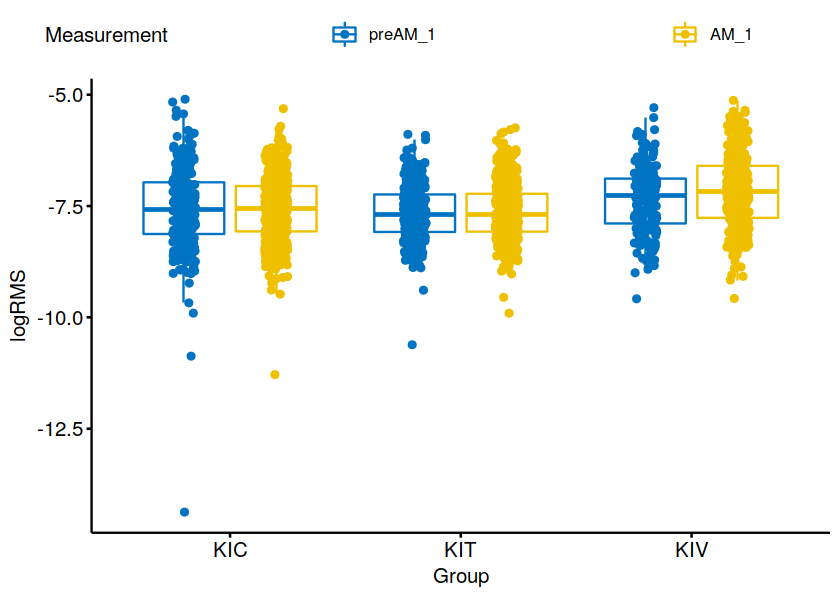

In [76]:
ggboxplot(
    temp_df, x = "Group", y = "logRMS", color = "Measurement", 
    palette = "jco", add = "jitter"
)

In [90]:
temp_df %>% 
    group_by(Group, Measurement) %>% 
    summarise(mean(RMS, na.rm = TRUE))

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


Group,Measurement,"mean(RMS, na.rm = TRUE)"
KIC,preAM_1,0.0007808821
KIC,AM_1,0.0006667752
KIT,preAM_1,0.0006016460
KIT,AM_1,0.0006038735
KIV,preAM_1,0.0008362031
KIV,AM_1,0.0010863293


In [94]:
model0 <- lmer(formula = logRMS ~ Group*Measurement + (1|Animal), data = temp_df)
summary(model0)

Linear mixed model fit by REML ['lmerMod']
Formula: logRMS ~ Group * Measurement + (1 | Animal)
   Data: temp_df

REML criterion at convergence: 3982.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.1429  -0.6067  -0.0278   0.6371   3.0517 

Random effects:
 Groups   Name        Variance Std.Dev.
 Animal   (Intercept) 0.1446   0.3803  
 Residual             0.4471   0.6686  
Number of obs: 1912, groups:  Animal, 26

Fixed effects:
                          Estimate Std. Error t value
(Intercept)              -7.559740   0.126832 -59.604
GroupKIT                 -0.080127   0.184339  -0.435
GroupKIV                  0.194293   0.197572   0.983
MeasurementAM_1           0.012830   0.052186   0.246
GroupKIT:MeasurementAM_1 -0.003143   0.074650  -0.042
GroupKIV:MeasurementAM_1  0.257726   0.080195   3.214

Correlation of Fixed Effects:
            (Intr) GrpKIT GrpKIV MsAM_1 GKIT:M
GroupKIT    -0.688                            
GroupKIV    -0.642  0.442              

* log effect of KIC group after the AM_1 = 0.012831; (e^(-7.559740+0.012831) = 0.0005)
* log effect of KIV group after the AM_1 = 0.194293 + 0.257726 = 0.452019; (0.0008)
* log effect of KIT group after the AM_1 = -0.080127 + -0.003143 = -0.08327; (0.0005)

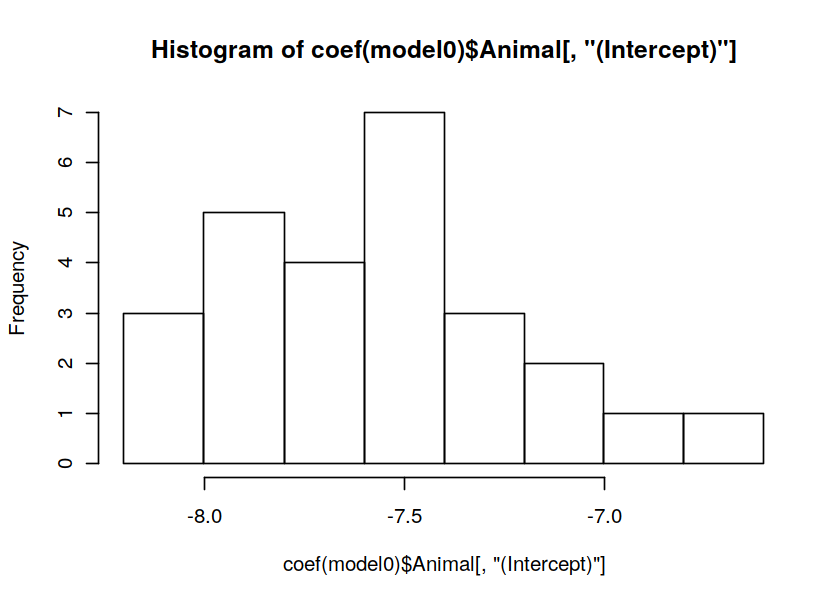

In [44]:
hist(coef(model0)$Animal[, "(Intercept)"])

$Animal


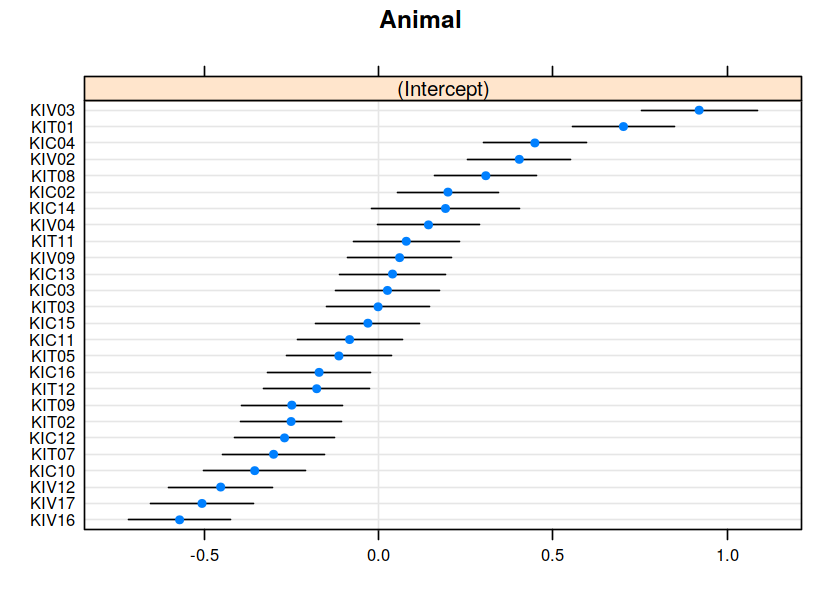

In [45]:
dotplot(ranef(model0, condVar = TRUE))

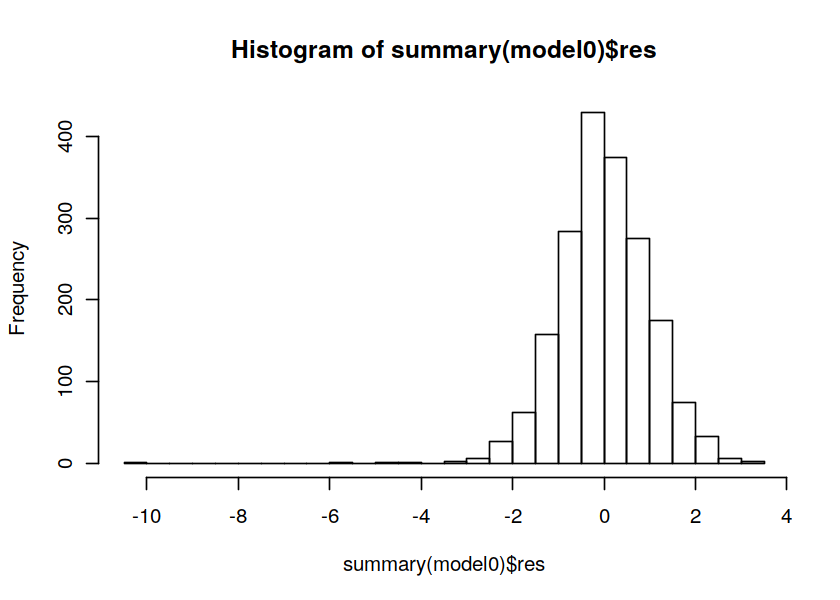

In [46]:
hist(summary(model0)$res, breaks = 25)

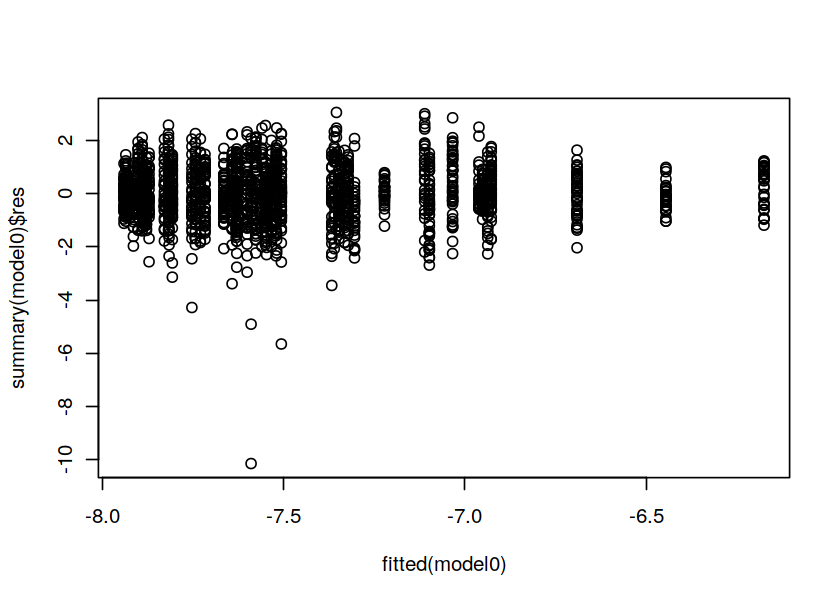

In [47]:
plot(fitted(model0), summary(model0)$res)

### (Measurement|Animal); random intercept & slope (by Measurement)

Notes to self: 

* cannot include random slope for Group due to correlation bw Animal and Group?
* `Group + Measurement + Group:Measurement` predictors reduce variance in estimating the slopes and the intercept
* `(Measurement|Animal)` reduces the **individual** level variance 

In [122]:
model1 <- lmer(
    formula = logRMS ~ Group*Measurement + (Measurement|Animal), 
    data = temp_df)
summary(model1)

Linear mixed model fit by REML ['lmerMod']
Formula: logRMS ~ Group * Measurement + (Measurement | Animal)
   Data: temp_df

REML criterion at convergence: 19937.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6231 -0.5722  0.0362  0.6470  3.6406 

Random effects:
 Groups   Name            Variance Std.Dev. Corr 
 Animal   (Intercept)     0.1594   0.3993        
          MeasurementAM_1 0.1006   0.3172   -0.18
 Residual                 0.4564   0.6756        
Number of obs: 9606, groups:  Animal, 26

Fixed effects:
                         Estimate Std. Error t value
(Intercept)              -7.43154    0.12757 -58.253
GroupKIT                 -0.08724    0.18534  -0.471
GroupKIV                  0.01138    0.19874   0.057
MeasurementAM_1          -0.04154    0.10348  -0.401
GroupKIT:MeasurementAM_1 -0.02752    0.14987  -0.184
GroupKIV:MeasurementAM_1  0.30889    0.16071   1.922

Correlation of Fixed Effects:
            (Intr) GrpKIT GrpKIV MsAM_1 GKIT:M
GroupKIT    

* log effect of KIC group after the AM_1 = 0.07467;
* log effect of KIV group after the AM_1 = 0.20534 + 0.19568 = 0.40102 ;
* log effect of KIT group after the AM_1 = -0.07181 + -0.07179 = -0.1436;

$Animal


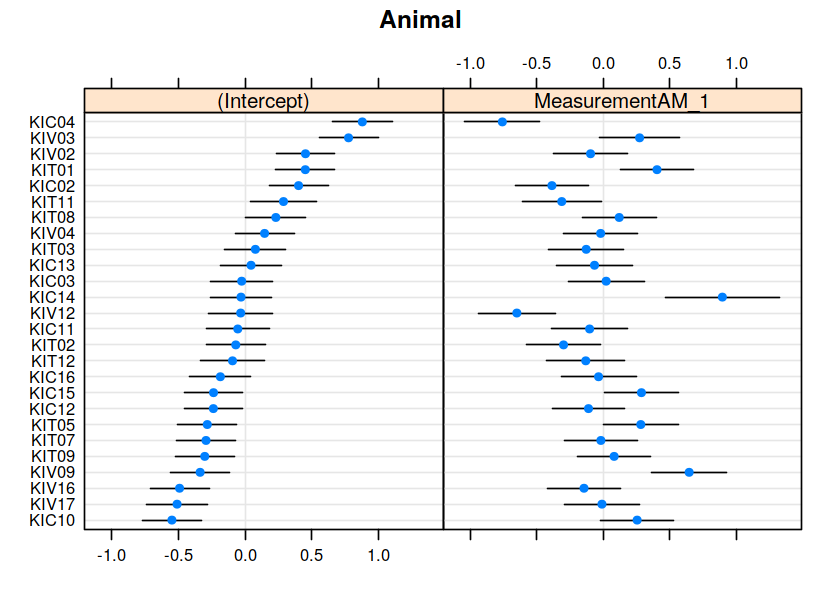

In [49]:
dotplot(ranef(model1, condVar = TRUE))

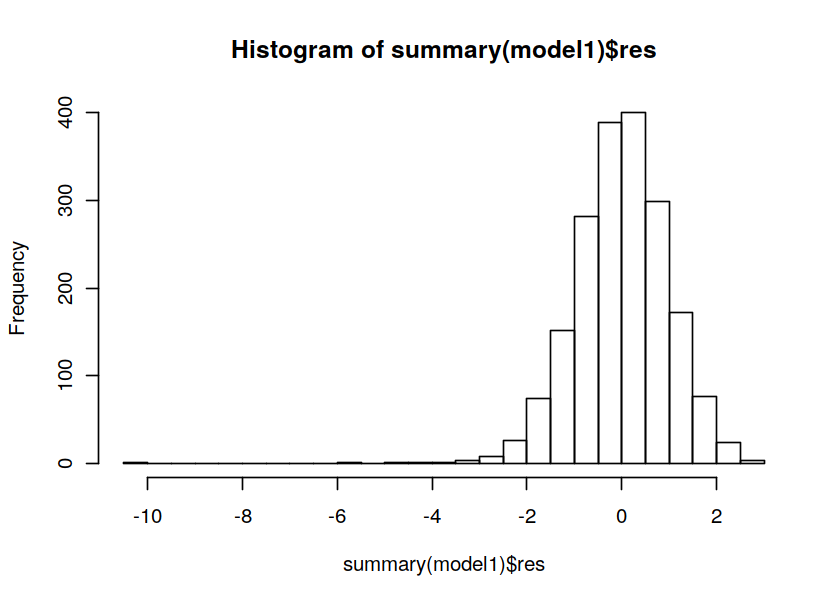

In [50]:
hist(summary(model1)$res, breaks = 25)

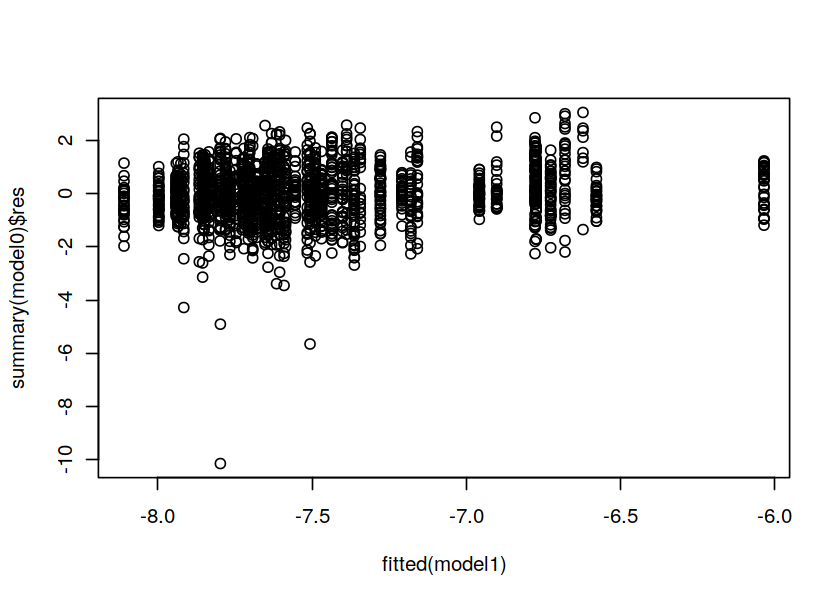

In [51]:
plot(fitted(model1), summary(model0)$res)

### Comparison

In [100]:
anova(model0, model1)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model0,8,3979.801,4024.248,-1981.900,3963.801,NA,NA,NA
model1,10,3912.138,3967.697,-1946.069,3892.138,71.66297,2,2.745258e-16


## logRMS ~ Group\*Measurement\*Layer + ClickFreq + (...|Animal)

* Random effect: Animal
* Fixed effect: Group\*Measurement\*Layer, ClickFreq
* OrderofClick = 1

### (1|Animal); random intercept, fixed slope

In [3]:
temp_df <- AVRECPeakAM %>% 
    filter(
        OrderofClick == 1,
#         Layer == "I_II",
        Measurement %in% c("preAM_1", "AM_1")) %>% 
    mutate(logRMS = log(RMS)) %>% 
    ungroup()

temp_df$Measurement <- factor(
    x = temp_df$Measurement, 
    levels = c("preAM_1", "AM_1"))

temp_df$Layer <- factor(x = temp_df$Layer)

In [107]:
# ggboxplot(
#     temp_df, x = "Group", y = "logRMS", color = "Measurement", 
#     palette = "jco", add = "jitter", facet.by = "OrderofClick"
# )

In [18]:
model <- lmer(
    formula = logRMS ~ Group*Measurement*Layer + ClickFreq +(Group|Animal), 
    data = temp_df)
summary(model)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 2 negative eigenvalues”
Correlation matrix not shown by default, as p = 31 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by REML ['lmerMod']
Formula: logRMS ~ Group * Measurement * Layer + ClickFreq + (Group | Animal)
   Data: temp_df

REML criterion at convergence: 103226.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.1998  -0.5698   0.0190   0.6244   4.5068 

Random effects:
 Groups   Name        Variance Std.Dev. Corr       
 Animal   (Intercept) 0.07699  0.2775              
          GroupKIT    0.01597  0.1264    0.69      
          GroupKIV    0.15382  0.3922   -0.54 -0.43
 Residual             0.46390  0.6811              
Number of obs: 49719, groups:  Animal, 27

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                        -6.9553063  0.0895932 -77.632
GroupKIT                           -0.1035488  0.1499508  -0.691
GroupKIV                           -0.1444666  0.1567239  -0.922
MeasurementAM_1                    -0.0239855  0.0229480  -1.045
LayerI_II                          -0.4596468  0.0

In [13]:
logLik(model)

'log Lik.' -51613.54 (df=33)

In [9]:
vcov(model) # correlation between the slope and the intercept

31 x 31 Matrix of class "dpoMatrix"
                                     (Intercept)      GroupKIT      GroupKIV
(Intercept)                         1.133532e-02 -1.132337e-02 -1.132338e-02
GroupKIT                           -1.132337e-02  2.265259e-02  1.132340e-02
GroupKIV                           -1.132338e-02  1.132340e-02  2.750021e-02
MeasurementAM_1                    -3.164168e-04  3.164241e-04  3.164241e-04
LayerI_II                          -3.168985e-04  3.164368e-04  3.164372e-04
LayerIV                            -3.166190e-04  3.164442e-04  3.164443e-04
LayerV                             -3.166150e-04  3.164414e-04  3.164416e-04
LayerVI                            -3.165231e-04  3.164424e-04  3.164425e-04
ClickFreq                          -7.755950e-07 -1.690961e-09 -9.319882e-10
GroupKIT:MeasurementAM_1            3.164159e-04 -6.386637e-04 -3.164241e-04
GroupKIV:MeasurementAM_1            3.164206e-04 -3.164241e-04 -7.690443e-04
GroupKIT:LayerI_II                  3.16

$Animal


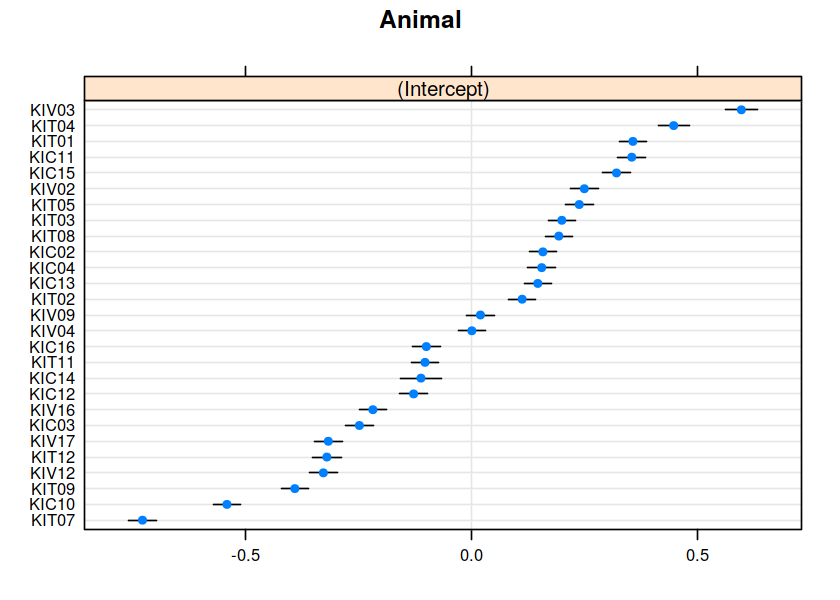

In [6]:
dotplot(ranef(model, condVar = TRUE))

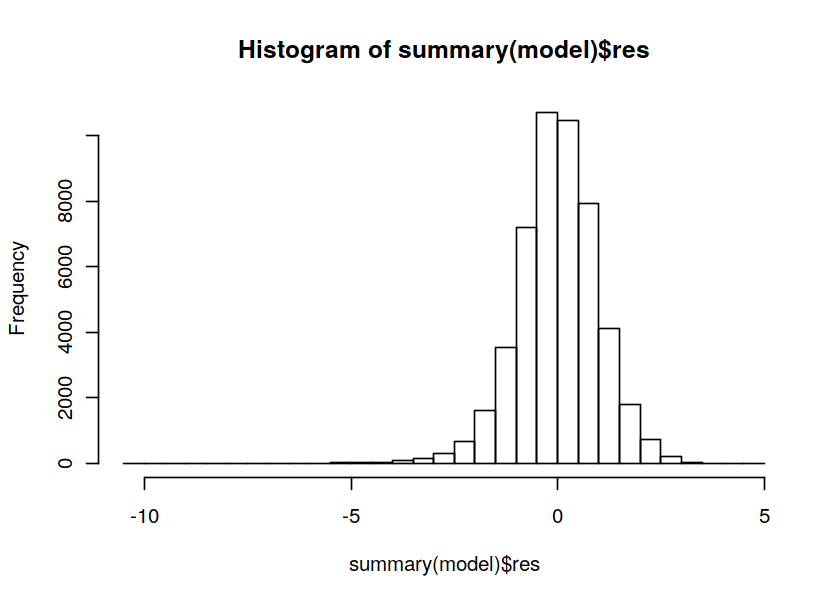

In [7]:
hist(summary(model)$res, breaks = 25)

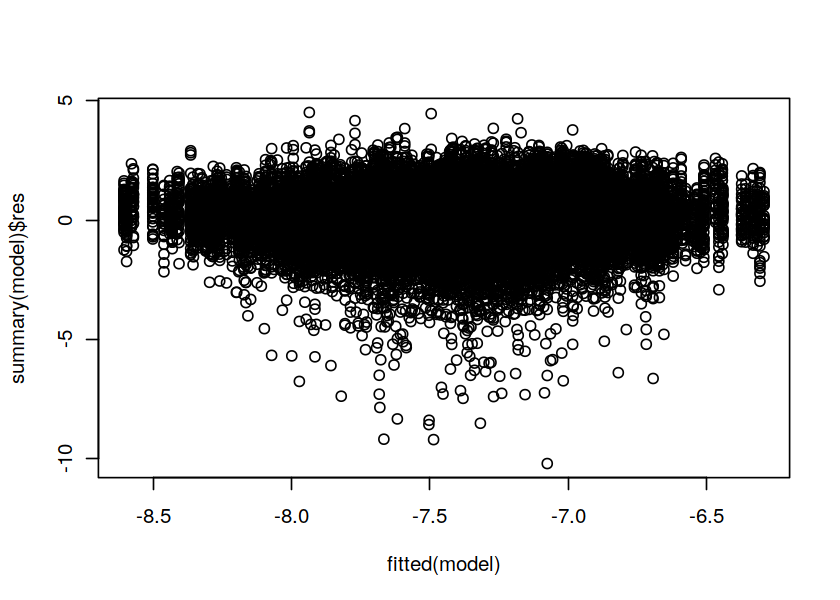

In [8]:
plot(fitted(model), summary(model)$res)

In [24]:
exp(-7.5)

[1] 0.0005530844

Variance in residuals increases since due to unbalanced clicks?

### (Measurement|Animal); random intercept & slope (by Measurement)

In [88]:
simple_model <- lmer(
    formula = RMS ~ Group*Measurement*OrderofClick + (Measurement|Animal), 
    data = temp_df)
summary(simple_model)

Linear mixed model fit by REML ['lmerMod']
Formula: RMS ~ Group * Measurement * OrderofClick + (Measurement | Animal)
   Data: temp_df

REML criterion at convergence: 17195.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2947 -0.5138 -0.1306  0.3128 11.3849 

Random effects:
 Groups   Name            Variance Std.Dev. Corr
 Animal   (Intercept)     0.1388   0.3726       
          MeasurementAM_1 0.2161   0.4648   0.01
 Residual                 0.3407   0.5837       
Number of obs: 9606, groups:  Animal, 26

Fixed effects:
                                       Estimate Std. Error t value
(Intercept)                            0.949442   0.123546   7.685
GroupKIT                              -0.176581   0.179415  -0.984
GroupKIV                              -0.063745   0.192203  -0.332
MeasurementAM_1                       -0.088991   0.154684  -0.575
OrderofClick                          -0.023049   0.011180  -2.062
GroupKIT:MeasurementAM_1              -0.009998   0

$Animal


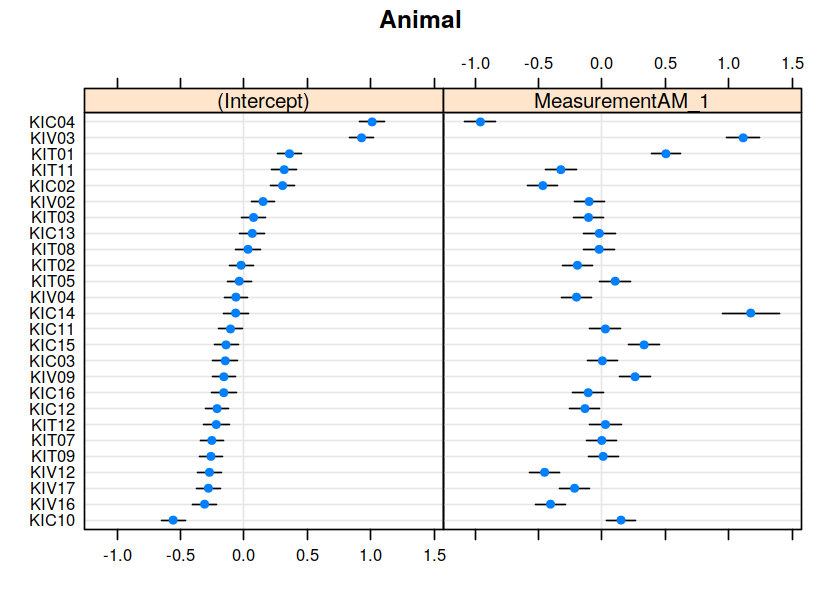

In [89]:
dotplot(ranef(simple_model, condVar = TRUE))

In [90]:
sqrt(mean(summary(simple_model)$res))

[1] 9.027063e-08

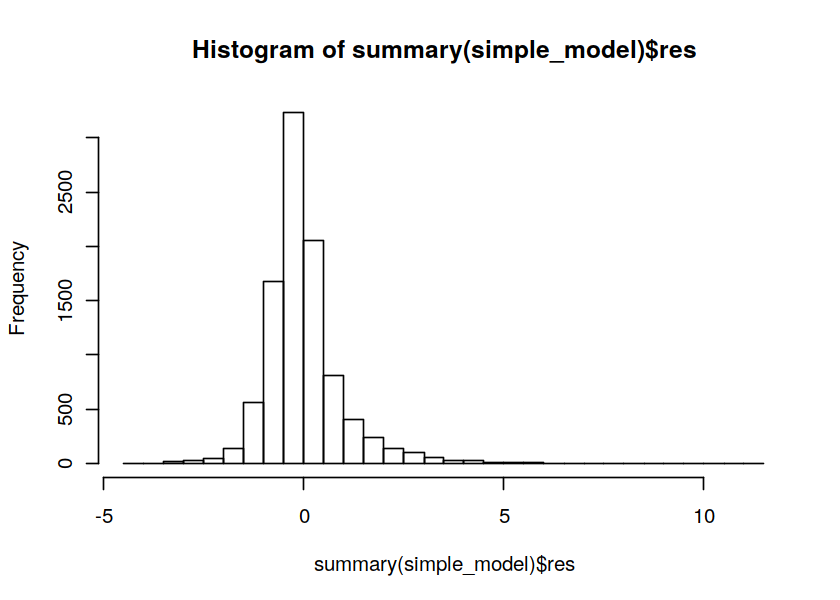

In [91]:
hist(summary(simple_model)$res, breaks = 25)

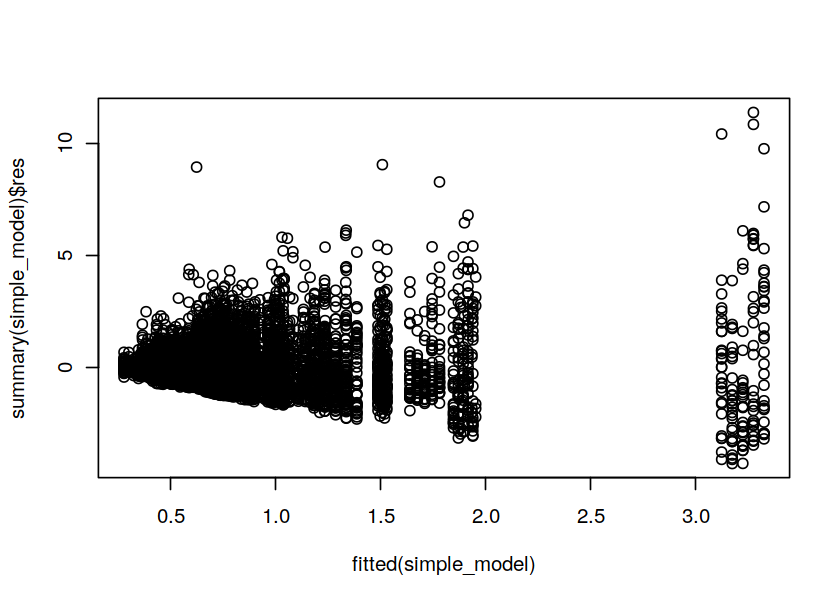

In [92]:
plot(fitted(simple_model), summary(simple_model)$res)